# **PROJECT POWERED BY Leonardo Cofone**

The project aims to analyze and predict heart disease using a dataset containing different medical characteristics of patients. The data analysis is performed through the use of Machine Learning algorithms, with the aim of building a model capable of predicting the probability of heart disease onset.

In particular, the project exploits a variety of classification algorithms, including logistic regression, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), and Gradient Boosting. Each model is trained and evaluated based on different performance metrics, including precision, recall, and F1 score, to determine which model offers the best predictive performance.

The dataset has been split into two sets: one for training (train set) and the other for testing the model (test set), ensuring that the model is evaluated on data never seen before, to avoid the phenomenon of overfitting. During the process, several preprocessing steps were applied, including missing data handling, normalization of numerical variables, and transformation of highly unbalanced variables.

Finally, a careful analysis of the models will allow selecting the most appropriate solution, contributing to the construction of a predictive system that could be used in clinical practice to support early diagnosis of heart disease.

## **1) Analyze all the data**

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import random
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

data = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

2025-04-25 12:38:03.508928: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745584683.779367      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745584683.860101      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## **2) Divide into test set and train set**

In [5]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(
   data, test_size=0.2, stratify=data["target"], random_state=42)

X_train = train_set.drop("target", axis=1)
y_train = train_set["target"].copy()

X_test = test_set.drop("target", axis=1)
y_test = test_set["target"].copy()

## **1) Continue analyzing the data**

In [6]:
#Check if there is categorical columns
categorical_cols = train_set.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index([], dtype='object')


In [7]:
#Check if there are heavy-tailed data
from scipy.stats import skew

numeric_cols = train_set.select_dtypes(include=np.number).columns
skewed_feats = train_set[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("Skew of numerical features:")
print(skewed_feats)

skewed_features = skewed_feats[skewed_feats > 0.8].index.tolist()
print("High skew features:", skewed_features)

skewed_features = [col for col in skewed_features if col in X_train.columns]

Skew of numerical features:
fbs         1.920805
oldpeak     1.263073
ca          1.245629
chol        0.938036
trestbps    0.764765
exang       0.674374
cp          0.560258
restecg     0.196455
target     -0.053678
age        -0.271297
thal       -0.460502
slope      -0.473870
thalach    -0.491578
sex        -0.847701
dtype: float64
High skew features: ['fbs', 'oldpeak', 'ca', 'chol']


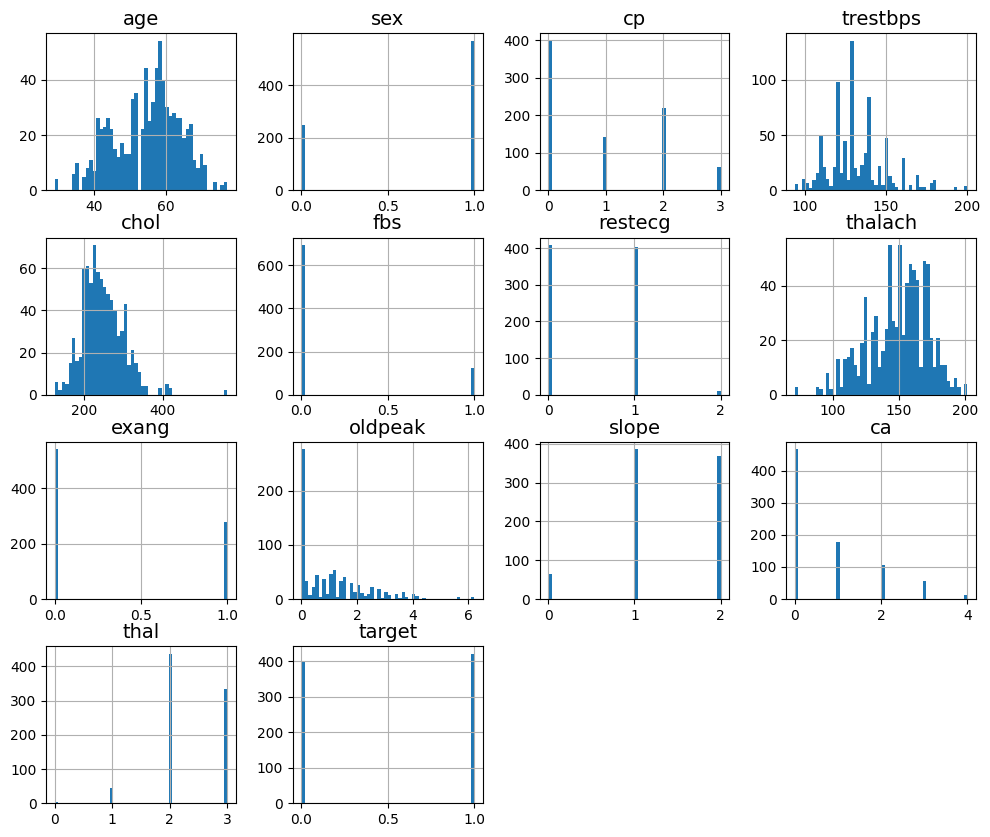

In [8]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set.hist(bins=50, figsize=(12, 10))
plt.show()

## **3) Create a pipeline for a better preprocessing**

In [9]:
#PIPELINE
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer

log_transformer = make_pipeline(                      
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler(),
)

numeric_transformer = make_pipeline(              
    SimpleImputer(strategy="median"),
    StandardScaler(),
)

preprocessor = ColumnTransformer([                       
    
    ("log", log_transformer, skewed_features),

    ("num", numeric_transformer, make_column_selector(dtype_include=np.number)),
])

## **4) Train and evaluate different model**

### Logistic regression

In [10]:
#TRAIN A LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ("preprocessor1", preprocessor),
    ("log_reg", LogisticRegression(max_iter=1000, random_state=42)),
])

In [11]:
#EVALUATE THE MODEL
from sklearn.model_selection import cross_val_predict
y_train_pred_1 = cross_val_predict(log_reg, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
cm_log_reg = confusion_matrix(y_train, y_train_pred_1)

print("Confusion Matrix For Logistic Regression:\n", cm_log_reg)
from sklearn.metrics import precision_score, recall_score
pre_log_reg = precision_score(y_train, y_train_pred_1)
rec_log_reg = recall_score(y_train, y_train_pred_1)

print(f"Recall: {rec_log_reg}")
print(f"Precision:  {pre_log_reg}")

Confusion Matrix For Logistic Regression:
 [[325  74]
 [ 48 373]]
Recall: 0.8859857482185273
Precision:  0.8344519015659956


In [12]:
from sklearn.metrics import classification_report

print("Classification Report, Logistic Regression:")
print(classification_report(y_train, y_train_pred_1))

Classification Report, Logistic Regression:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       399
           1       0.83      0.89      0.86       421

    accuracy                           0.85       820
   macro avg       0.85      0.85      0.85       820
weighted avg       0.85      0.85      0.85       820



### Random forest classifier

In [13]:
#TRAIN A RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_clf = Pipeline([
    ("preprocessor2", preprocessor),
    ("rf_clf", RandomForestClassifier(random_state=42)),
])

In [14]:
#EVALUATING THE MODEL
y_train_pred_2 = cross_val_predict(rf_clf, X_train, y_train, cv=3)
cm_rf_clf = confusion_matrix(y_train, y_train_pred_2)
print("Confusion matrix for random forest regressor:\n", cm_rf_clf)

pre_rf_clf = precision_score(y_train, y_train_pred_2)
rec_rf_clf = recall_score(y_train, y_train_pred_2)
print(f"Recall: {rec_rf_clf}")
print(f"Precision:  {pre_rf_clf}")

Confusion matrix for random forest regressor:
 [[383  16]
 [ 16 405]]
Recall: 0.9619952494061758
Precision:  0.9619952494061758


In [15]:
print("Classification Report, Random Forest:")
print(classification_report(y_train, y_train_pred_2))

Classification Report, Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       399
           1       0.96      0.96      0.96       421

    accuracy                           0.96       820
   macro avg       0.96      0.96      0.96       820
weighted avg       0.96      0.96      0.96       820



### SVC classifier

In [16]:
#TRAIN A SVC CLASSIFIER
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svc_clf = Pipeline([
    ("prepocessor3", preprocessor),
    ("svc_clf", SVC(random_state=42, probability=True)),
])

In [17]:
#EVALUATE THE MODEL
y_train_pred_3 = cross_val_predict(svc_clf, X_train, y_train, cv=3)
cm_svc_clf = confusion_matrix(y_train, y_train_pred_3)
print("Confusion matrix for the SVC regressor:\n", cm_svc_clf)

pre_svc_clf = precision_score(y_train, y_train_pred_3)
rec_svc_clf = recall_score(y_train, y_train_pred_3)
print(f"Recall: {rec_svc_clf}")
print(f"Precision:  {pre_svc_clf}")

Confusion matrix for the SVC regressor:
 [[343  56]
 [ 31 390]]
Recall: 0.9263657957244655
Precision:  0.874439461883408


In [18]:
print("Classification Report, SVC:")
print(classification_report(y_train, y_train_pred_3))

Classification Report, SVC:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       399
           1       0.87      0.93      0.90       421

    accuracy                           0.89       820
   macro avg       0.90      0.89      0.89       820
weighted avg       0.90      0.89      0.89       820



### KNeighbors classifier

In [19]:
#TRAIN A KNeighborsClassifier MODEL
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_clf = Pipeline([
    ("preprocessor4", preprocessor),
    ("knn_clf", KNeighborsClassifier()),
])  

In [20]:
#EVALUATE THE MODEL

y_train_pred_4 = cross_val_predict(knn_clf, X_train, y_train, cv=3)
cm_knn_clf = confusion_matrix(y_train, y_train_pred_4)
print("Confusion matrix for KNeighborsClassifier:\n", cm_knn_clf)
rec_knn_clf = recall_score(y_train, y_train_pred_4)
pre_knn_clf = precision_score(y_train, y_train_pred_4)
print(f"Recall: {rec_knn_clf}")
print(f"Precision:  {pre_knn_clf}")

Confusion matrix for KNeighborsClassifier:
 [[327  72]
 [ 64 357]]
Recall: 0.8479809976247031
Precision:  0.8321678321678322


In [21]:
print("Classification Report, KNeighborsClassifier:")
print(classification_report(y_train, y_train_pred_4))

Classification Report, KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       399
           1       0.83      0.85      0.84       421

    accuracy                           0.83       820
   macro avg       0.83      0.83      0.83       820
weighted avg       0.83      0.83      0.83       820



### GradientBoosting classifier

In [22]:
#TRAIN A GradientBoostingClassifier MODEL
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gb_clf = Pipeline([
    ("preprocessor5", preprocessor),
    ("gb_clf", GradientBoostingClassifier(random_state=42)),
])

In [23]:
#EVALUATE THE MODEL
y_train_pred_5 = cross_val_predict(gb_clf, X_train, y_train, cv=3)
cm_gb_clf = confusion_matrix(y_train, y_train_pred_5)
print("Confusion matrix for GradientBoostingClassifier:\n", cm_gb_clf)
rec_gb_clf = recall_score(y_train, y_train_pred_5)
pre_gb_clf = precision_score(y_train, y_train_pred_5)
print(f"Recall: {rec_gb_clf}")
print(f"Precision:  {pre_gb_clf}")

Confusion matrix for GradientBoostingClassifier:
 [[374  25]
 [ 17 404]]
Recall: 0.9596199524940617
Precision:  0.9417249417249417


In [24]:
print("Classification Report, GradientBoostingClassifier: ")
print(classification_report(y_train, y_train_pred_5))

Classification Report, GradientBoostingClassifier: 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       399
           1       0.94      0.96      0.95       421

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



### Compare all the models

In [25]:
from sklearn.metrics import f1_score

print("F1 Logistic Regression:", f1_score(y_train, y_train_pred_1))
print("F1 Random Forest:", f1_score(y_train, y_train_pred_2))
print("F1 SVC:", f1_score(y_train, y_train_pred_3))
print("F1 KNeighborsClassifier:", f1_score(y_train, y_train_pred_4))
print("F1 GradientBoostingClassifier:", f1_score(y_train, y_train_pred_5))

F1 Logistic Regression: 0.8594470046082949
F1 Random Forest: 0.9619952494061758
F1 SVC: 0.8996539792387542
F1 KNeighborsClassifier: 0.84
F1 GradientBoostingClassifier: 0.9505882352941176


## WE UNDERSTAND THAT RANDOM FORSET CLASSIFIER IS THE BEST MODEL

### Choice of the best parameters

In [26]:
#GRIDSEARCH FOR THE BEST MODEL
from sklearn.model_selection import GridSearchCV

param_grid = {
    "rf_clf__n_estimators": [100, 200, 300],
    "rf_clf__max_depth": [None, 10, 20, 30],
    "rf_clf__min_samples_split": [2, 5, 10],
    "rf_clf__min_samples_leaf": [1, 2, 4],
    "rf_clf__bootstrap": [True, False],
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor2',
                                        ColumnTransformer(transformers=[('log',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'log1p'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['fbs',
                                                                          'oldpeak',
                                                                          'ca',
                                                                          'chol']),
                                                                        ('num',
                                                                         Pipeline(st...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7c23583a57d0>)])),
                                       ('rf_clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf_clf__bootstrap': [True, False],
                         'rf_clf__max_depth': [None, 10, 20, 30],
                         'rf_clf__min_samples_leaf': [1, 2, 4],
                         'rf_clf__min_samples_split': [2, 5, 10],
                         'rf_clf__n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [27]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best hyperparameters: {'rf_clf__bootstrap': False, 'rf_clf__max_depth': None, 'rf_clf__min_samples_leaf': 1, 'rf_clf__min_samples_split': 2, 'rf_clf__n_estimators': 100}
Best F1 score: 0.9715367549666257


### Train the best model with the best hyperparameters

In [28]:
#TRAIN THE FINAL AND THE BEST MODEL
final_rf_model = Pipeline([
    ("preprocessor", preprocessor),
    ("rf_clf", RandomForestClassifier(
        n_estimators= 100,
        max_depth= None,
        min_samples_split= 2,
        min_samples_leaf= 1,
        bootstrap= False
    )),
])

final_rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['fbs', 'oldpeak', 'ca',
                                                   'chol']),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c23583a57d0>)])),
                ('rf_clf', RandomForestClassifier(bootstrap=False))])

### Evaluate the final model on the real test set

In [29]:
#MAKING THE REAL TEST ON THE TEST SET

y_test_pred = final_rf_model.predict(X_test)

from sklearn.metrics import classification_report, f1_score, confusion_matrix

print("Confusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

print("Classification report (Test Set):")
print(classification_report(y_test, y_test_pred))

fin_f1 = f1_score(y_test, y_test_pred)
print("F1 Score (Test Set):", fin_f1)

Confusion Matrix (Test Set):
[[100   0]
 [  0 105]]
Classification report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

F1 Score (Test Set): 1.0


### We have almost reached perfection

In [30]:
#ONLY TO SHOW THAT IS NOT OVERFITTING

f1_sco_train = f1_score(y_train, y_train_pred_2)
print(f"F1 score in the train set: {f1_sco_train}")
print(f"F1 score in the test set (the real test): {fin_f1}")

print("Class distribution in the train set:")
print(y_train.value_counts())
print("Class distribution in the test set:")
print(y_test.value_counts())

print("Duplicate data between training and test sets:", len(set(X_train.index).intersection(set(X_test.index))))

F1 score in the train set: 0.9619952494061758
F1 score in the test set (the real test): 1.0
Class distribution in the train set:
target
1    421
0    399
Name: count, dtype: int64
Class distribution in the test set:
target
1    105
0    100
Name: count, dtype: int64
Duplicate data between training and test sets: 0
